### Non-Parametric (Historical) Monte-Carlo VaR 

In [275]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf 
import matplotlib.pyplot as plt
from scipy.stats import norm 

### Calculate daily average log (pf return)

[*********************100%%**********************]  1 of 1 completed
/var/folders/2s/v39gg9613d19myl82nsw55yh0000gn/T/ipykernel_11667/4287118693.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(range(0, days + 1))


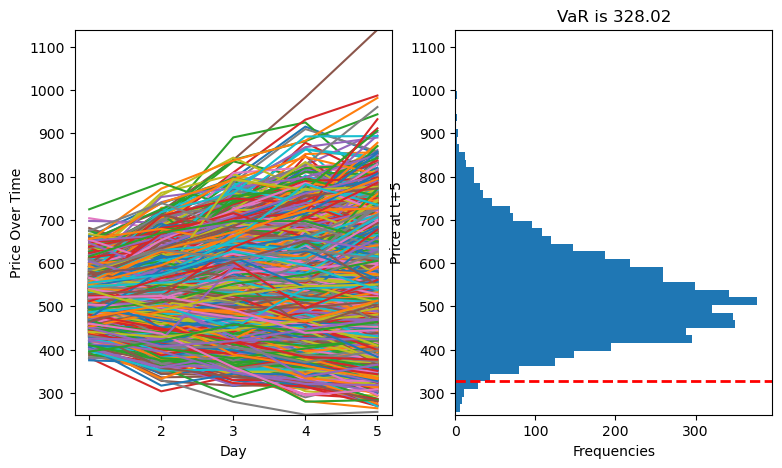

Historical P/F daily average log return is 0.00098
Historical P/F daily average log SD is 0.00046


In [480]:
# Load Data, Calculate daily average log return, standard deviation
ticker = ['META']
data = yf.download(ticker, start = (dt.datetime.now() - dt.timedelta(days=365*5)) , end = dt.datetime.now())

weights = np.array([1/len(ticker)]*len(ticker))

log_return = np.log(historic_daily_price/historic_daily_price.shift(1))
mu = (log_return.mean())
pf_mu=np.sum(mu*weight)

cov_mat = log_return.cov()
pf_st = weight.T @ cov_mat @ weight

z_score = np.random.normal(0,1,size=(int(days),simulation))

def scenario_returns(mean,days,z_score,std):
#    z_score = np.random.normal(0,1)
    return mean * days + z_score * std * np.sqrt(days)

# Build Monte Carlo Simulations and calculate VaR at 99% for 5 days 

simulation = 5000
days = 5

z_score = np.random.normal(0,1,size=(int(days),simulation))

def scenario_returns(mean,days,z_score,std):
#    z_score = np.random.normal(0,1)
    return mean * days + z_score * std * np.sqrt(days)

confidence_level = 0.99


VaR = np.percentile(final_price, (1-confidence_level)*100)

rets = pd.DataFrame(scenario_returns(pf_mu,days,z_score,0.04))

price_ = 504 * np.exp(rets.cumsum())

final_price = price_.iloc[4,:]

ymin = min(price_.min().min(), final_price.min())
ymax = max(price_.max().max(), final_price.max())
#print(rets)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(9,5))
#
price_.plot(ax=ax1, legend=False)
ax1.set_xlabel('Day')
ax1.set_ylabel('Price Over Time')
ax1.set_xticklabels(range(0, days + 1))
ax1.set_ylim([ymin,ymax])
#ax1.set_xticklabels(range(1, days + 1))

final_price.hist(ax=ax2, bins=50, orientation='horizontal')
ax2.grid(False)
ax2.axhline(y=VaR, color='red', linestyle='--', linewidth=2, label=f'VaR (5%): {VaR:.2f}')
ax2.set_xlabel('Frequencies')
ax2.set_ylabel('Price at t+5')
ax2.set_title(f'VaR is {round(VaR,2)}')
ax2.set_ylim([ymin,ymax])
plt.show()
#ax1.plot(price_, legend=False)
print(f'Historical P/F daily average log return is {pf_mu.round(5)}')
print(f'Historical P/F daily average log SD is {pf_st.round(5)}')